Advanced (level 3) Task 1

 Description: Analyze and model time-series data to
 forecast future values (e.g., stock prices, sales)

Step 0: Setup and Data Preparation

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
df = pd.read_csv(
        '/content/2) Stock Prices Data Set.csv',
        parse_dates=['date'],
        index_col='date'
    )

Load Stock prices dataset in CSV file:

In [41]:
import pandas as pd

try:
    # Read the CSV file without specifying a date column or index.
    # This allows us to inspect and clean the column names first.
    df = pd.read_csv('/content/2) Stock Prices Data Set.csv')

    # Clean the column names by stripping any leading/trailing whitespace
    df.columns = df.columns.str.strip()

    # Convert the 'Date' column to datetime objects
    df['date'] = pd.to_datetime(df['date'])

    # Now, set the cleaned 'Date' column as the DataFrame index
    df = df.set_index('date')

    print("DataFrame loaded successfully and 'Date' column is set as the index.")
    print("First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    print(df.info())

except FileNotFoundError:
    print("Error: The file '/content/2) Stock Prices Data Set.csv' was not found.")
    print("Please ensure the file is uploaded and the path is correct.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

DataFrame loaded successfully and 'Date' column is set as the index.
First 5 rows:
           symbol      open      high       low     close    volume
date                                                               
2014-01-02    AAL   25.0700   25.8200   25.0600   25.3600   8998943
2014-01-02   AAPL   79.3828   79.5756   78.8601   79.0185  58791957
2014-01-02    AAP  110.3600  111.8800  109.2900  109.7400    542711
2014-01-02   ABBV   52.1200   52.3300   51.5200   51.9800   4569061
2014-01-02    ABC   70.1100   70.2300   69.4800   69.8900   1148391

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497472 entries, 2014-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   open    497461 non-null  float64
 2   high    497464 non-null  float64
 3   low     497464 non-null  float64
 4   close   497472 non-null  float64
 5   volume  497472 non-null  in

Step 1: Plot and Decompose the Time Series

Plots saved successfully.


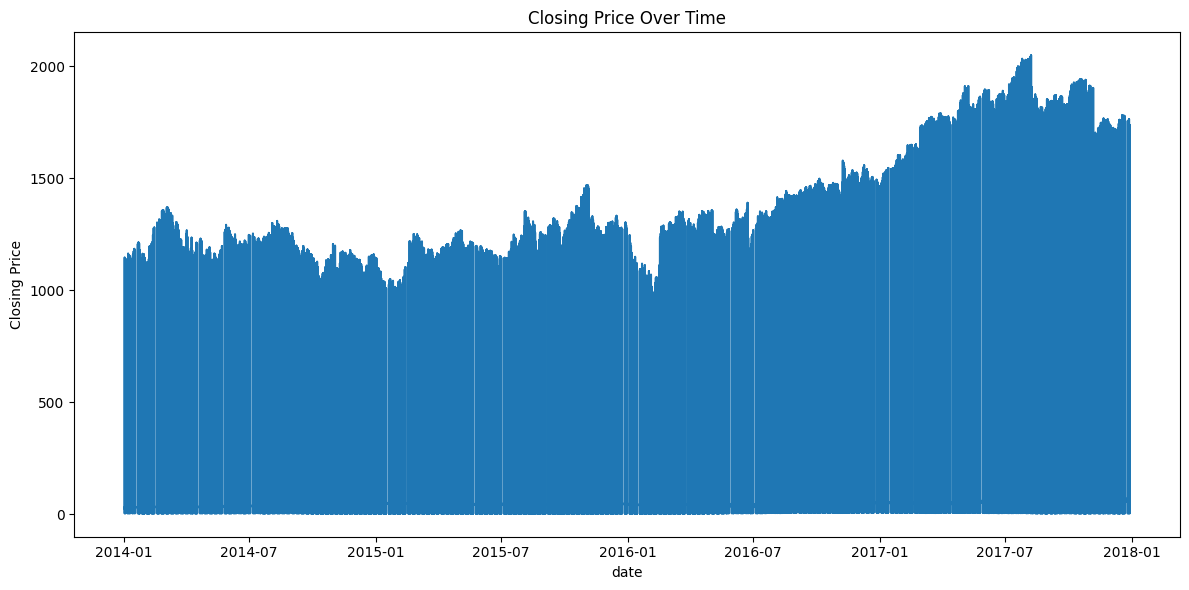

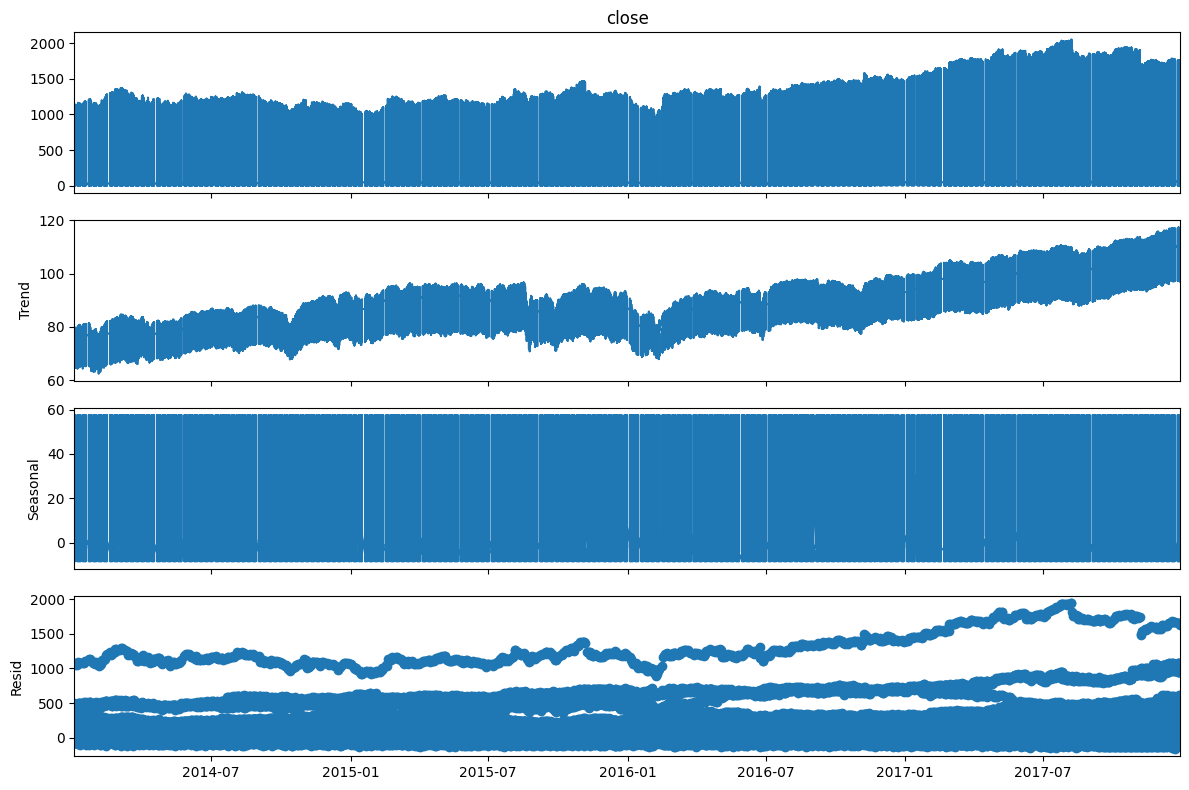

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

try:
    # Read the CSV file and handle the date column correctly
    df = pd.read_csv('/content/2) Stock Prices Data Set.csv')
    df.columns = df.columns.str.strip()
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')

    # Drop rows with any NaN values to prepare for seasonal decomposition
    df = df.dropna()

    # Plot the raw time series data for the 'close' column
    plt.figure(figsize=(12, 6))
    plt.plot(df['close'])
    plt.title('Closing Price Over Time')
    plt.xlabel('date')
    plt.ylabel('Closing Price')
    plt.tight_layout()
    plt.savefig("stock_closing_price_plot.png")

    # Decompose the time series for the 'close' column
    # The decomposition will show trend, seasonality, and residual components.
    decomposition = seasonal_decompose(df['close'], model='additive', period=252) # Assuming a yearly period for daily data
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.tight_layout()
    plt.savefig("stock_price_decomposition.png")

    print("Plots saved successfully.")

except FileNotFoundError:
    print("Error: The file '/content/2) Stock Prices Data Set.csv' was not found.")
    print("Please ensure the file is uploaded and the path is correct.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Step 2: Implement Moving Average and Exponential Smoothing

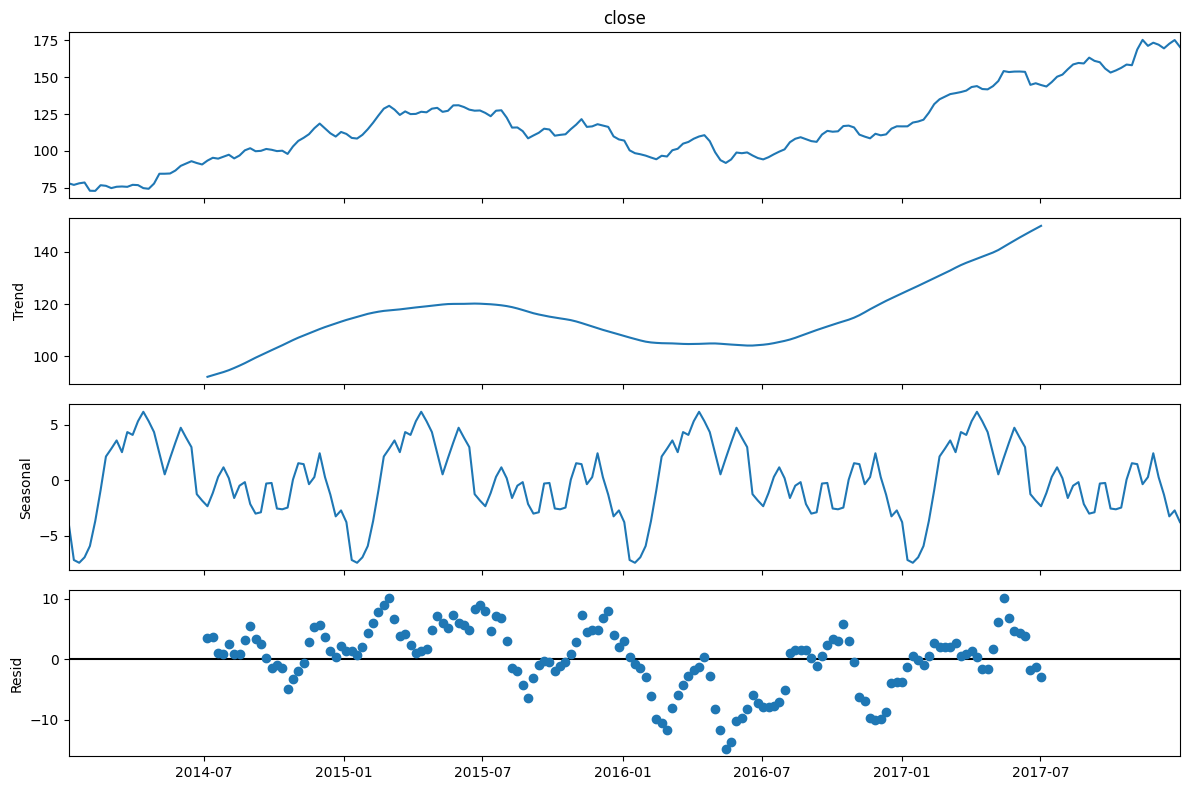

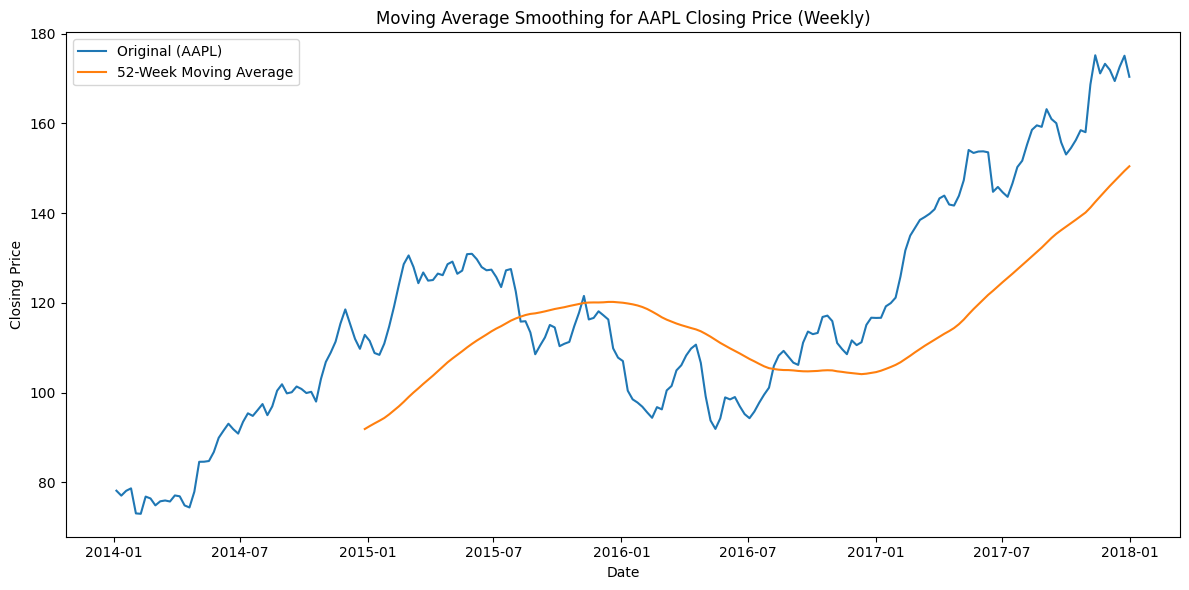

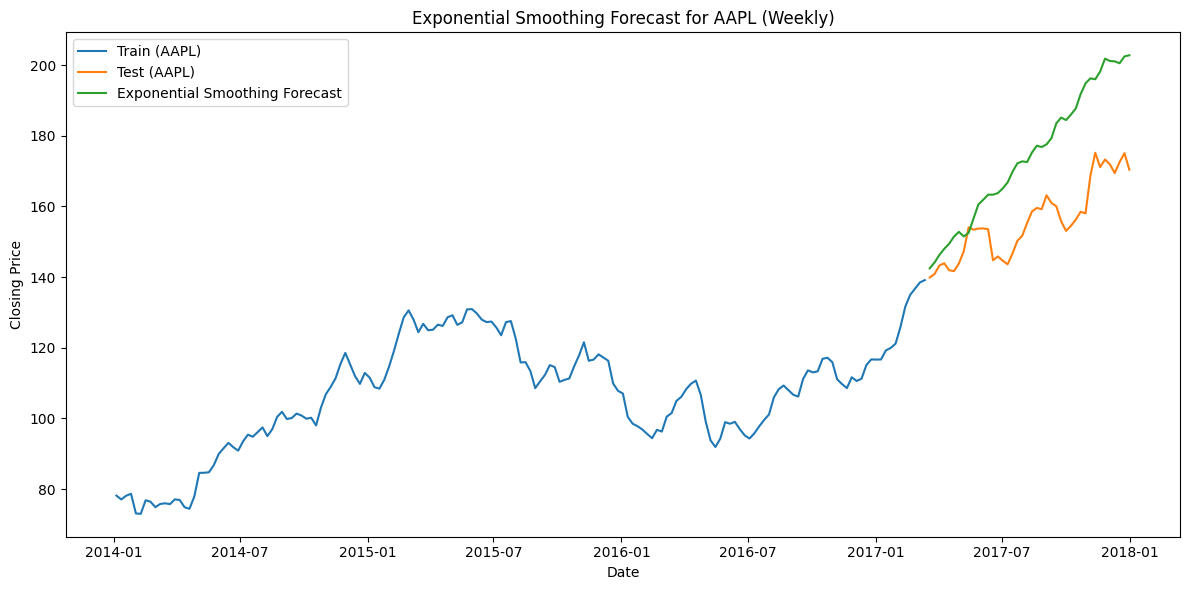

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

try:
    # 1. Read the CSV file and clean the data
    df = pd.read_csv('/content/2) Stock Prices Data Set.csv')
    df.columns = df.columns.str.strip()
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')

    # 2. Filter for a single stock symbol (e.g., 'AAPL')
    single_stock_df = df[df['symbol'] == 'AAPL'].copy()

    if single_stock_df.empty:
        print("Error: Could not find data for the specified stock symbol 'AAPL'.")
        print("Please check the available symbols in your dataset.")
    else:
        # 3. Resample the data to a weekly frequency and take the mean.
        weekly_stock_data = single_stock_df['close'].resample('W').mean()

        # 4. Drop any resulting NaN values
        weekly_stock_data = weekly_stock_data.dropna()

        # 5. --- Perform time series analysis on the weekly data ---

        # Decompose the time series
        decomposition = seasonal_decompose(weekly_stock_data, model='additive', period=52) # 52 weeks in a year
        fig = decomposition.plot()
        fig.set_size_inches(12, 8)
        plt.tight_layout()
        plt.show()

        # 6. Simple Moving Average - Calculate the moving average on the resampled data
        window_size = 52
        moving_average = weekly_stock_data.rolling(window=window_size).mean()

        # 7. Plot to visualize the smoothing effect
        plt.figure(figsize=(12, 6))
        plt.plot(weekly_stock_data, label='Original (AAPL)')
        plt.plot(moving_average, label=f'{window_size}-Week Moving Average')
        plt.title('Moving Average Smoothing for AAPL Closing Price (Weekly)')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # 8. Exponential Smoothing (Holt-Winters)
        train_size = int(len(weekly_stock_data) * 0.8)
        train = weekly_stock_data.iloc[:train_size]
        test = weekly_stock_data.iloc[train_size:]

        if len(test) == 0:
            print("Error: The test set is empty. Cannot perform a forecast.")
            print("This may be because there isn't enough data for the 80/20 split.")
        else:
            model_es = ExponentialSmoothing(
                train,
                trend='add',
                seasonal='add',
                seasonal_periods=52
            ).fit()
            forecast_es = model_es.forecast(len(test))

            # Plot the forecast
            plt.figure(figsize=(12, 6))
            plt.plot(train, label='Train (AAPL)')
            plt.plot(test, label='Test (AAPL)')
            plt.plot(forecast_es, label='Exponential Smoothing Forecast')
            plt.title('Exponential Smoothing Forecast for AAPL (Weekly)')
            plt.xlabel('Date')
            plt.ylabel('Closing Price')
            plt.legend()
            plt.tight_layout()
            plt.show()

except FileNotFoundError:
    print("Error: The file '/content/2) Stock Prices Data Set.csv' was not found.")
    print("Please ensure the file is uploaded and the path is correct.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Step 3: Build an ARIMA or SARIMA Model

Step 4: Evaluate the Model and Visualize the Forecast

ARIMA Model Fitted Successfully.
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  167
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -384.831
Date:                Thu, 07 Aug 2025   AIC                            775.663
Time:                        08:13:49   BIC                            784.998
Sample:                    01-05-2014   HQIC                           779.452
                         - 03-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0837      0.198      0.422      0.673      -0.305       0.472
ma.L1          0.3510      0.191      1.839      0.066      -0.023       0.725
sigma2         6.03

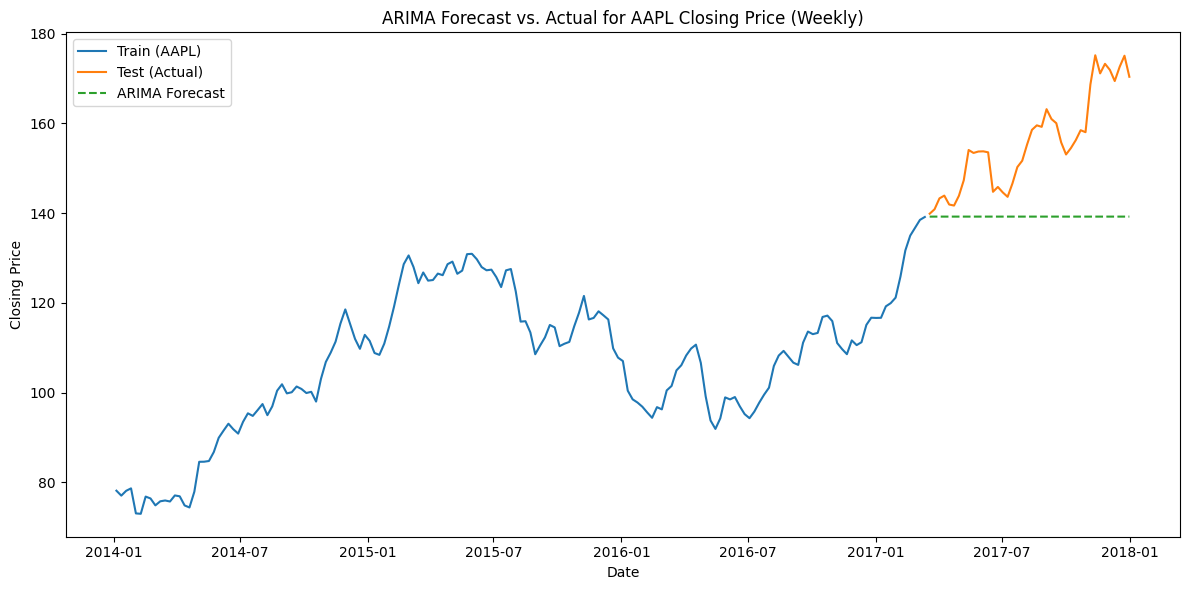

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

try:
    # 1. Read the CSV file and clean the data
    df = pd.read_csv('/content/2) Stock Prices Data Set.csv')
    df.columns = df.columns.str.strip()
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')

    # 2. Filter for a single stock symbol (e.g., 'AAPL')
    single_stock_df = df[df['symbol'] == 'AAPL'].copy()

    if single_stock_df.empty:
        print("Error: Could not find data for the specified stock symbol 'AAPL'.")
    else:
        # 3. Resample the data to a weekly frequency and take the mean.
        weekly_stock_data = single_stock_df['close'].resample('W').mean()
        weekly_stock_data = weekly_stock_data.dropna()

        # 4. Split the data into training and testing sets
        train_size = int(len(weekly_stock_data) * 0.8)
        train = weekly_stock_data.iloc[:train_size]
        test = weekly_stock_data.iloc[train_size:]

        if len(test) == 0:
            print("Error: The test set is empty. Cannot perform a forecast.")
        else:
            # Step 3: Build an ARIMA Model
            # A simple ARIMA(1,1,1) model is chosen as a starting point.
            arima_model = ARIMA(train, order=(1, 1, 1))
            arima_model_fit = arima_model.fit()
            print("ARIMA Model Fitted Successfully.")
            print(arima_model_fit.summary())

            # Step 4: Evaluate the Model and Visualize the Forecast
            # Forecast the values for the test period
            forecast = arima_model_fit.forecast(steps=len(test))

            # Calculate the Mean Squared Error (MSE)
            mse = mean_squared_error(test, forecast)
            print(f"\nMean Squared Error (MSE) of the ARIMA forecast: {mse:.4f}")

            # Plot the training data, test data, and the forecast
            plt.figure(figsize=(12, 6))
            plt.plot(train, label='Train (AAPL)')
            plt.plot(test, label='Test (Actual)')
            plt.plot(forecast, label='ARIMA Forecast', linestyle='--')
            plt.title('ARIMA Forecast vs. Actual for AAPL Closing Price (Weekly)')
            plt.xlabel('Date')
            plt.ylabel('Closing Price')
            plt.legend()
            plt.tight_layout()
            plt.savefig("arima_forecast_plot.png")

            print("ARIMA forecast plot saved successfully.")

except FileNotFoundError:
    print("Error: The file '/content/2) Stock Prices Data Set.csv' was not found.")
    print("Please ensure the file is uploaded and the path is correct.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")